In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import norm
%matplotlib inline

In [2]:
df=pd.read_csv('data.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.dropna(axis=1,inplace=True)

In [5]:
df.drop(columns=['id'],axis=1,inplace=True)

In [6]:
df.shape

(569, 31)

In [7]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#df.isnull().sum()

In [ ]:
#df.isna().sum()

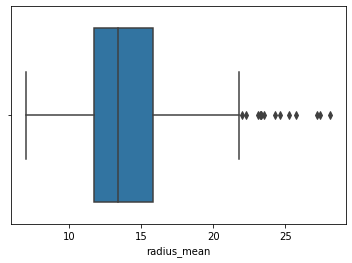

In [8]:
sns.boxplot(x=df["radius_mean"])

In [9]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [10]:
'''for i in df.columns:
    if i != "diagnosis":
        sns.boxplot(x=df[i])
        plt.show()'''
    #print(i)

'for i in df.columns:\n    if i != "diagnosis":\n        sns.boxplot(x=df[i])\n        plt.show()'

In [11]:
X=df.iloc[:,1:]
y=df.iloc[:,1]

In [ ]:
X.head()

In [14]:
lower_limit, upper_limit = X['radius_mean'].quantile([0.001, 0.999])
print(lower_limit, upper_limit)

outliers = df[(X['radius_mean']>upper_limit) | (X['radius_mean']<lower_limit)]
outliers

7.3842799999999995 27.718080000000015


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
101,B,6.981,13.43,43.79,143.5,0.1170,0.07568,0.0000,0.0000,0.1930,...,7.93,19.54,50.41,185.2,0.1584,0.1202,0.0000,0.0000,0.2932,0.09382
212,M,28.110,18.47,188.50,2499.0,0.1142,0.15160,0.3201,0.1595,0.1648,...,28.11,18.47,188.50,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525


In [15]:
df2 = X[(X['radius_mean']<upper_limit) & (X['radius_mean']>lower_limit)]
df2.shape

(567, 30)

In [22]:
def remove_outlier_using_quantile():
    global X
    for i in X.columns:
        print(i)
        sns.boxplot(x=X[i])
        plt.show()
        lower_limit, upper_limit = X[i].quantile([0.001, 0.999])
        print(i,lower_limit, upper_limit)

        outliers = X[(X[i]>upper_limit) | (X[i]<lower_limit)]
        print('outliers',outliers.shape)
        X = X[(X[i]<upper_limit) & (X[i]>lower_limit)]
        print(X.shape)
        
        sns.boxplot(x=X[i])
        plt.show()

radius_mean


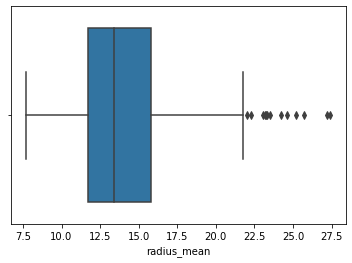

radius_mean 7.712508 27.306800000000017
outliers (2, 30)
(565, 30)


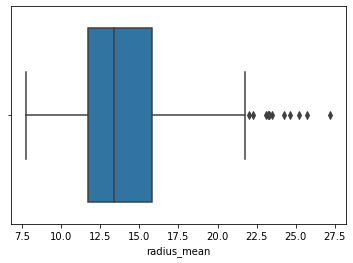

texture_mean


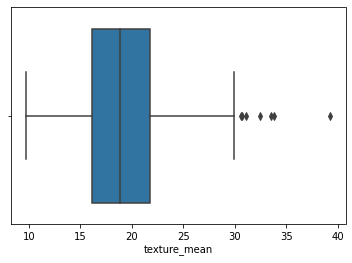

texture_mean 10.087880000000002 36.194920000000195
outliers (2, 30)
(563, 30)


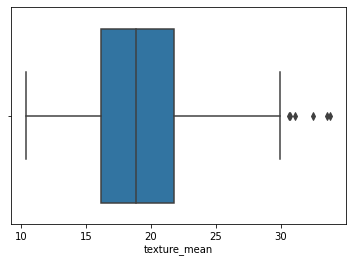

perimeter_mean


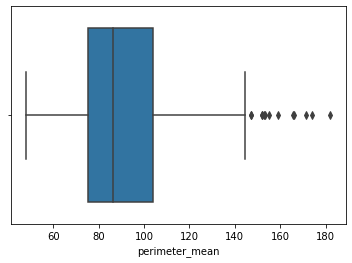

perimeter_mean 47.953720000000004 177.6602000000008
outliers (2, 30)
(561, 30)


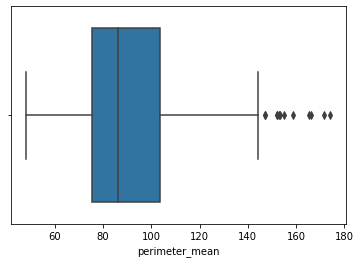

area_mean


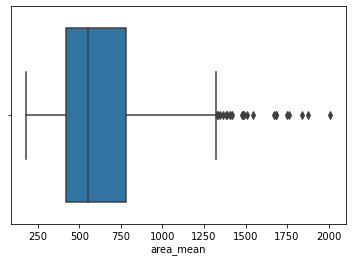

area_mean 191.736 1936.0800000000072
outliers (2, 30)
(559, 30)


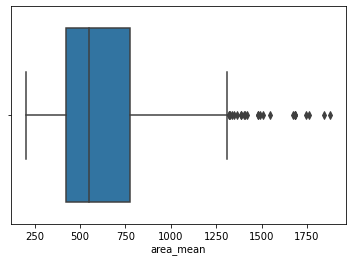

smoothness_mean


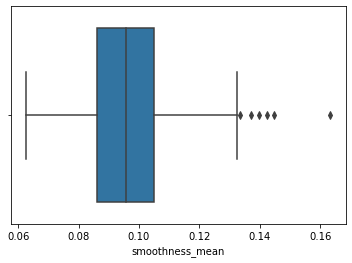

smoothness_mean 0.06350323999999999 0.15296540000000014
outliers (2, 30)
(557, 30)


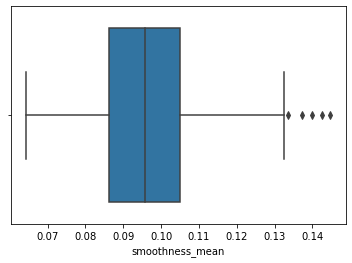

compactness_mean


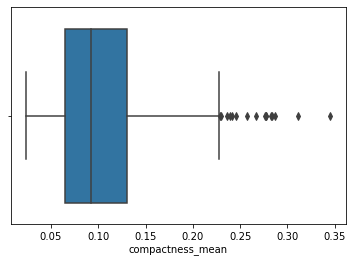

compactness_mean 0.02514136 0.3264960000000025
outliers (2, 30)
(555, 30)


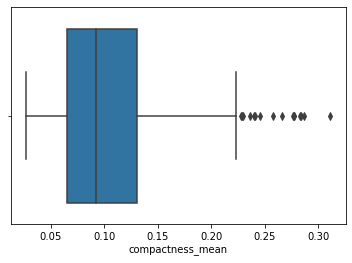

concavity_mean


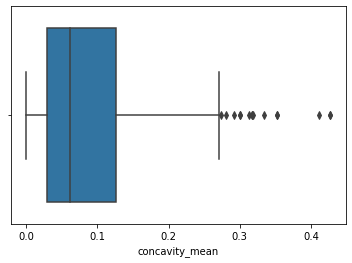

concavity_mean 0.0 0.4265784
outliers (1, 30)
(545, 30)


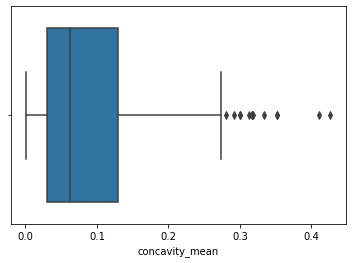

concave points_mean


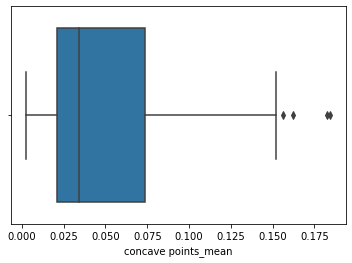

concave points_mean 0.00268688 0.18330320000000005
outliers (2, 30)
(543, 30)


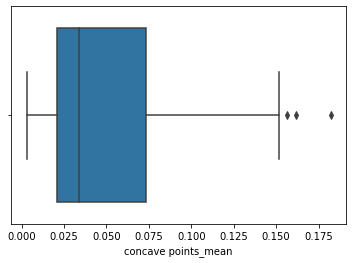

symmetry_mean


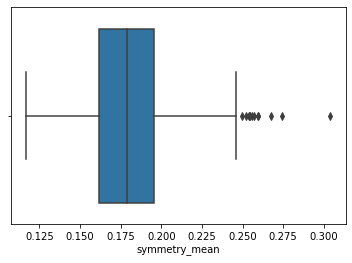

symmetry_mean 0.11865120000000001 0.28790260000000245
outliers (2, 30)
(541, 30)


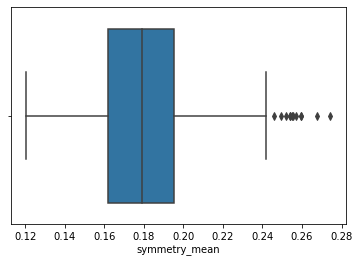

fractal_dimension_mean


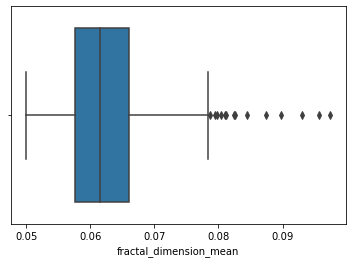

fractal_dimension_mean 0.0501112 0.09652740000000007
outliers (2, 30)
(539, 30)


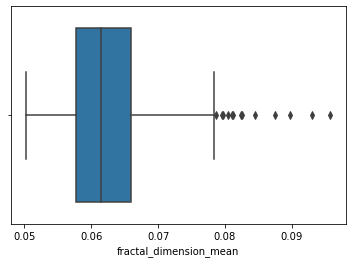

radius_se


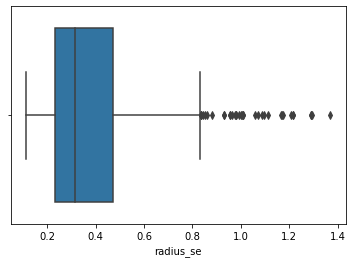

radius_se 0.1130602 1.3301880000000077
outliers (2, 30)
(537, 30)


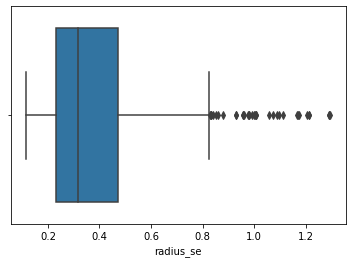

texture_se


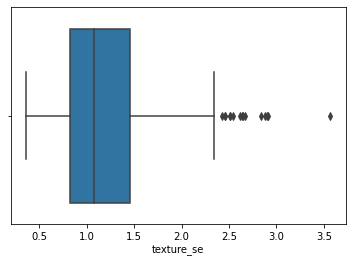

texture_se 0.3612184 3.2153120000000364
outliers (2, 30)
(535, 30)


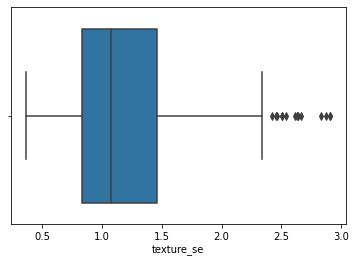

perimeter_se


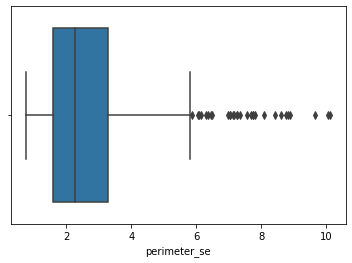

perimeter_se 0.7646896 10.08262
outliers (2, 30)
(533, 30)


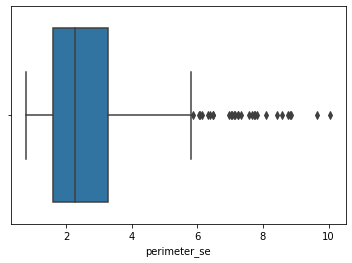

area_se


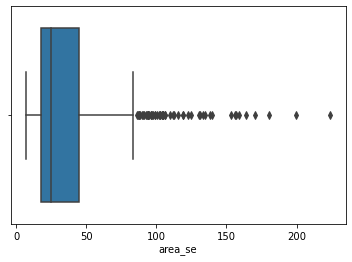

area_se 7.042464000000001 211.1192000000018
outliers (2, 30)
(531, 30)


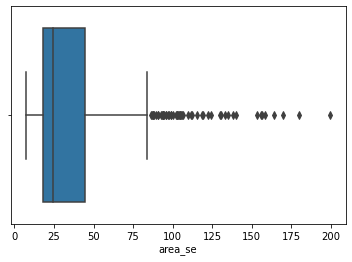

smoothness_se


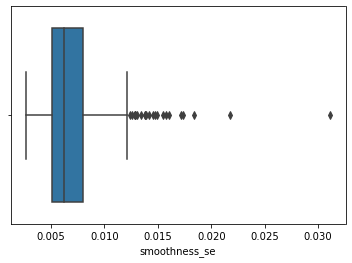

smoothness_se 0.00275127 0.026169200000000253
outliers (2, 30)
(529, 30)


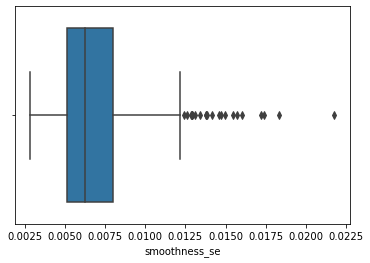

compactness_se


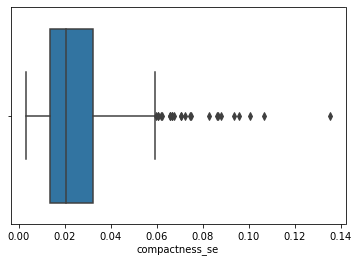

compactness_se 0.003380544 0.12008800000000272
outliers (2, 30)
(527, 30)


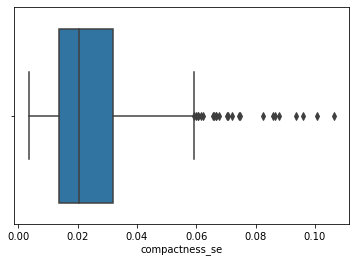

concavity_se


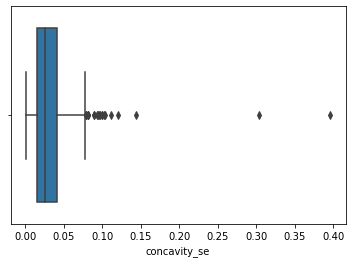

concavity_se 0.0007450733999999999 0.34750280000000433
outliers (2, 30)
(525, 30)


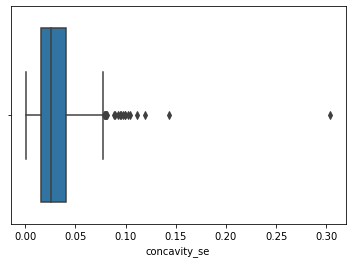

concave points_se


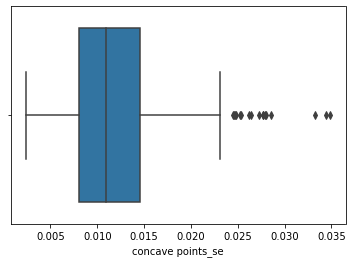

concave points_se 0.002667912 0.034628960000000056
outliers (2, 30)
(523, 30)


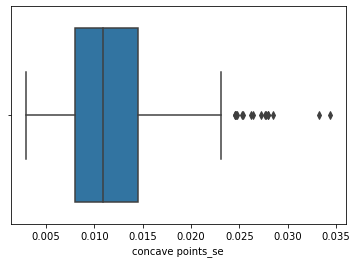

symmetry_se


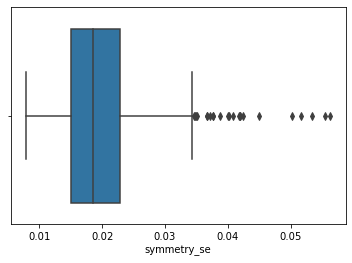

symmetry_se 0.008746954000000001 0.05583630000000005
outliers (2, 30)
(521, 30)


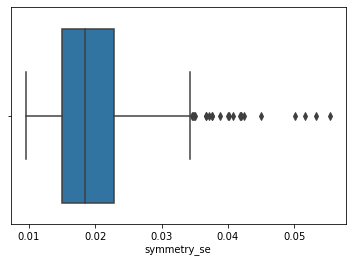

fractal_dimension_se


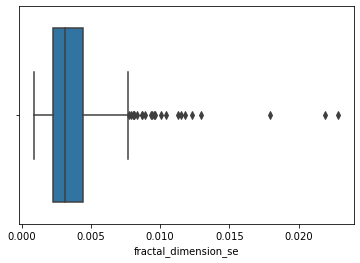

fractal_dimension_se 0.0009236080000000001 0.02237640000000002
outliers (2, 30)
(519, 30)


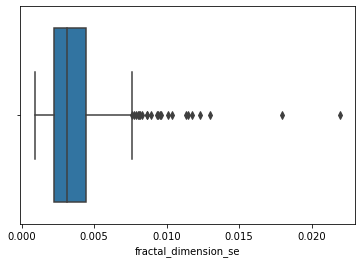

radius_worst


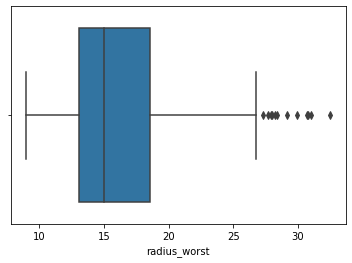

radius_worst 9.030304000000001 31.723360000000127
outliers (2, 30)
(517, 30)


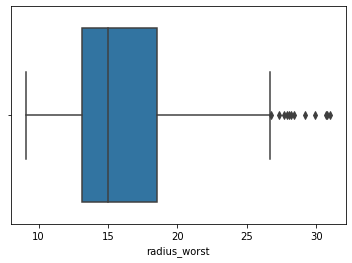

texture_worst


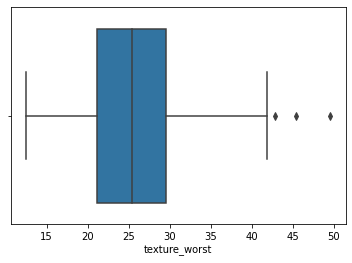

texture_worst 13.37236 47.40892000000015
outliers (2, 30)
(515, 30)


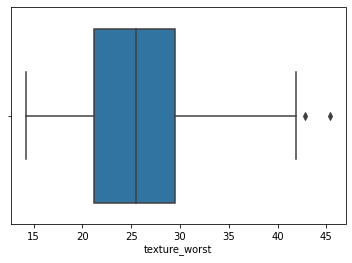

perimeter_worst


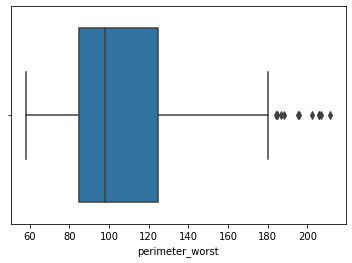

perimeter_worst 59.01548 209.0842000000005
outliers (2, 30)
(513, 30)


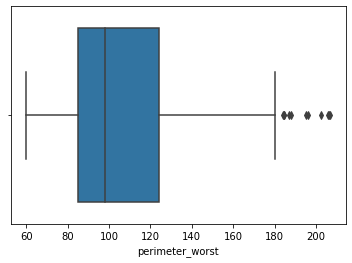

area_worst


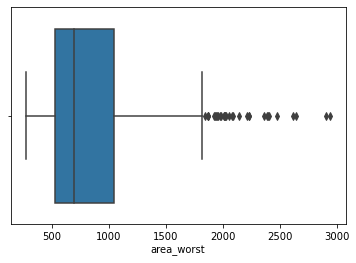

area_worst 271.9968 2924.544000000002
outliers (2, 30)
(511, 30)


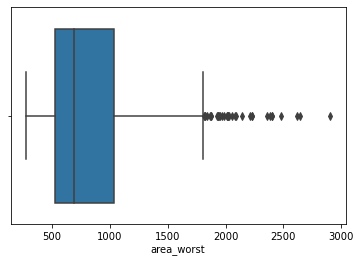

smoothness_worst


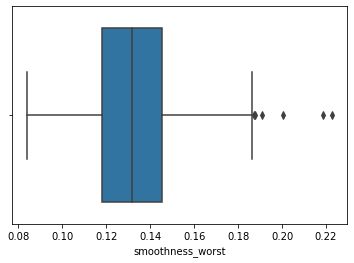

smoothness_worst 0.0844725 0.22045800000000026
outliers (2, 30)
(509, 30)


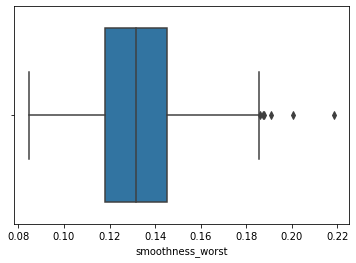

compactness_worst


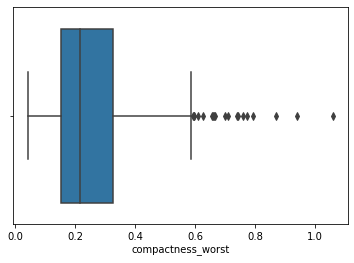

compactness_worst 0.04475335999999999 0.9969892000000091
outliers (2, 30)
(507, 30)


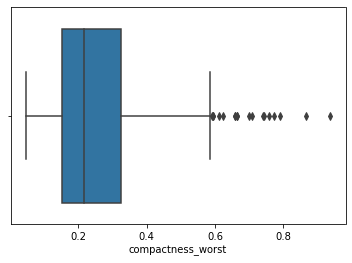

concavity_worst


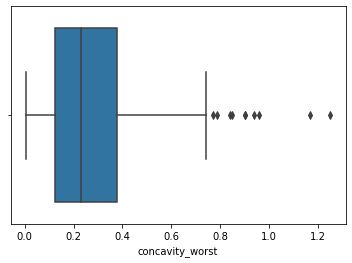

concavity_worst 0.005239878 1.2105080000000024
outliers (2, 30)
(505, 30)


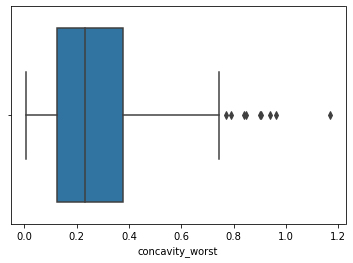

concave points_worst


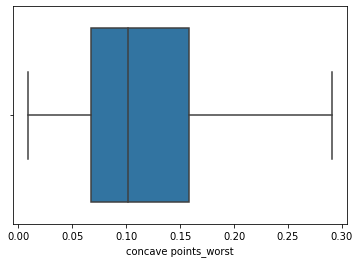

concave points_worst 0.011351472000000001 0.29064720000000005
outliers (2, 30)
(503, 30)


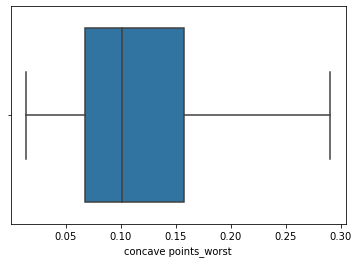

symmetry_worst


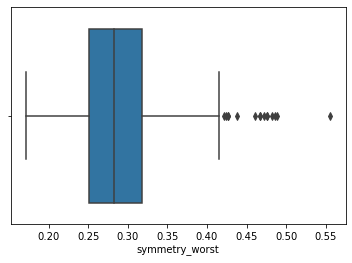

symmetry_worst 0.17476419999999998 0.5218648000000032
outliers (2, 30)
(501, 30)


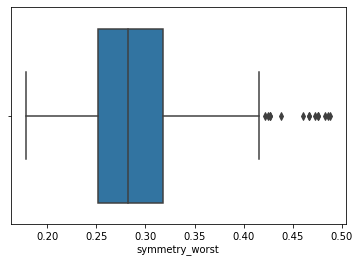

fractal_dimension_worst


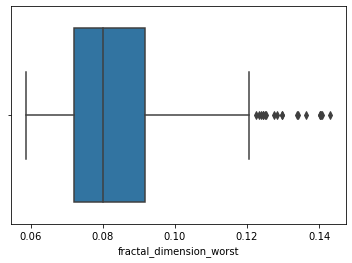

fractal_dimension_worst 0.05868 0.14200000000000013
outliers (2, 30)
(499, 30)


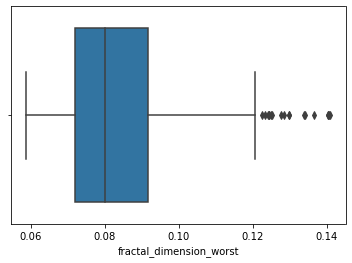

In [23]:
remove_outlier_using_quantile()

In [24]:
X.shape

(499, 30)

In [ ]:
#sc_X=StandardScaler()

In [ ]:
#X=sc_X.fit_transform(X)

In [ ]:
type(X)

In [ ]:
df.shape

In [ ]:
X.shape

In [ ]:
X['radius_mean'].describe()

In [ ]:
from scipy.stats import norm

In [ ]:
sns.boxplot(X['radius_mean'])
plt.show()

plt.hist(X['radius_mean'], bins=20, rwidth=0.8)
plt.xlabel('radius_mean')
plt.ylabel('Count')
plt.show()


In [ ]:
max_limit = X['radius_mean'].mean() + 3*X['radius_mean'].std()
min_limit = X['radius_mean'].mean() - 3*X['radius_mean'].std()
print( min_limit,max_limit)

In [ ]:
print(X[(X['radius_mean']>max_limit) | (X['radius_mean']<min_limit)].shape)
print('outliers ',len(X[(X['radius_mean']>max_limit) | (X['radius_mean']<min_limit)]))
X[(X['radius_mean']>max_limit) | (X['radius_mean']<min_limit)]

In [ ]:
z_score=(X['radius_mean']-X['radius_mean'].mean())/X['radius_mean'].std()
z_score

In [ ]:
X[(X['radius_mean']>max_limit) | (X['radius_mean']<min_limit)]

In [ ]:
X[(X['radius_mean']>min_limit) & (X['radius_mean']<max_limit)]

In [ ]:
# radious mean outlier removed
X=X[(X['radius_mean']>min_limit) & (X['radius_mean']<max_limit)]

In [ ]:
X.shape

In [ ]:
X[(X['radius_mean'] > max_limit)]

In [ ]:
X[(X['radius_mean'] > max_limit) & (X['radius_mean']<min_limit)]

In [ ]:
for i in X.columns:
    print(i)
    print(X[i].dtype)

In [30]:
def check_outlier():
    global X
    print(X.shape)
    for i in X.columns:
        print(i)
        print()
        X[i].describe()
        sns.boxplot(X[i])
        plt.show()

        plt.hist(X[i], bins=20, rwidth=0.8)
        plt.xlabel(i)
        plt.ylabel('Count')
        rng = np.arange(X[i].min(), X[i].max(), 0.1)
        plt.plot(rng, norm.pdf(rng,X[i].mean(),X[i].std()))
        plt.show()
        max_limit = X[i].mean() + 3*X[i].std()
        min_limit = X[i].mean() - 3*X[i].std()
        print(i, min_limit,max_limit)
        
        print(X[(X[i]>max_limit) | (X[i]<min_limit)].shape)
        print(i,' outliers ',len(X[(X[i]>max_limit) | (X[i]<min_limit)]))
        
        X[(X[i]>max_limit) | (X[i]<min_limit)]

(499, 30)
radius_mean



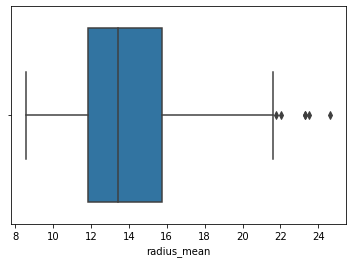

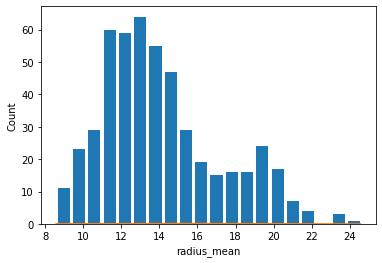

radius_mean 4.639209471435564 23.564257462432195
(1, 30)
radius_mean  outliers  1
texture_mean



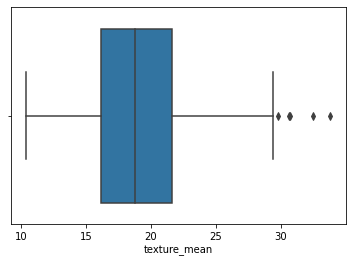

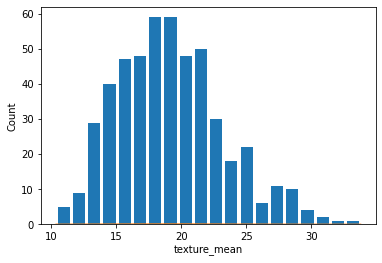

texture_mean 6.86513447252533 31.453663122665066
(2, 30)
texture_mean  outliers  2
perimeter_mean



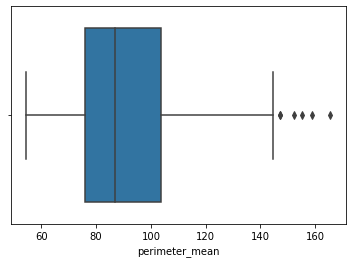

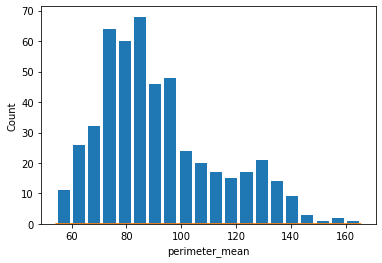

perimeter_mean 26.763791540792653 156.6397355133156
(2, 30)
perimeter_mean  outliers  2
area_mean



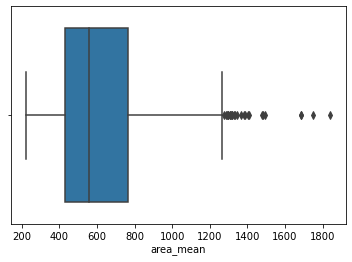

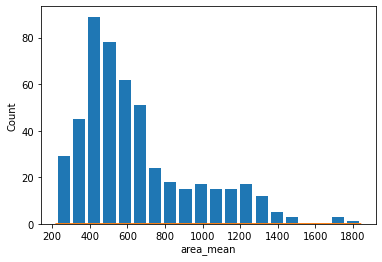

area_mean -266.76353748183885 1556.2929963996758
(4, 30)
area_mean  outliers  4
smoothness_mean



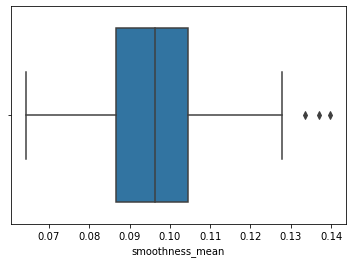

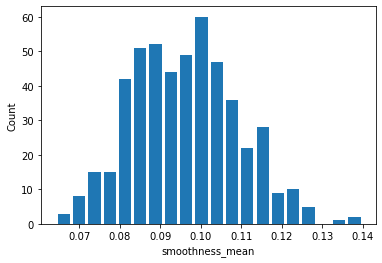

smoothness_mean 0.05705380700762256 0.13523921904448147
(2, 30)
smoothness_mean  outliers  2
compactness_mean



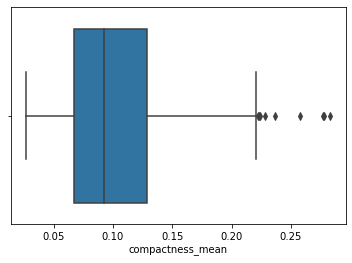

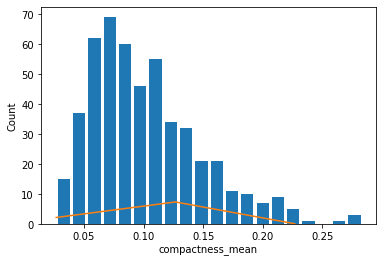

compactness_mean -0.03676473883078303 0.24065988913138425
(4, 30)
compactness_mean  outliers  4
concavity_mean



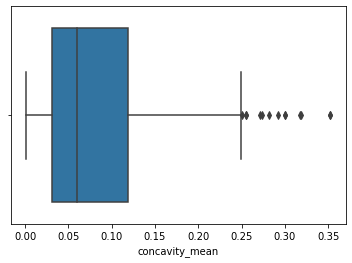

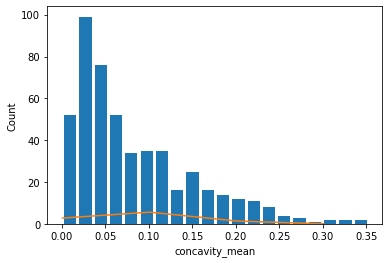

concavity_mean -0.12293935089319144 0.29122496892926353
(7, 30)
concavity_mean  outliers  7
concave points_mean



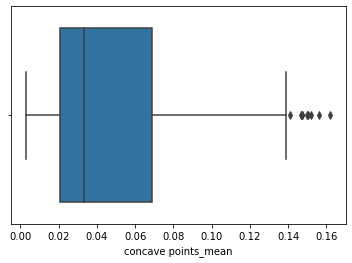

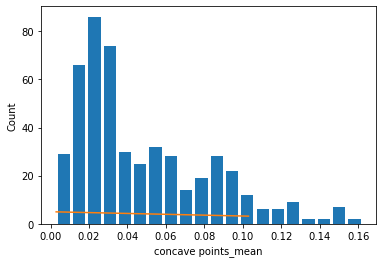

concave points_mean -0.056153379535466265 0.15149898674989512
(3, 30)
concave points_mean  outliers  3
symmetry_mean



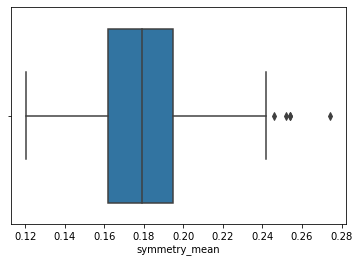

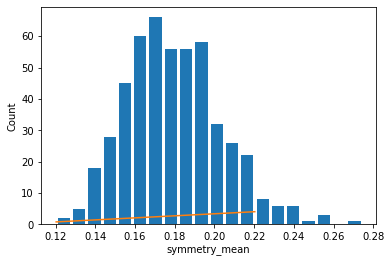

symmetry_mean 0.107371053750941 0.25223175186028157
(3, 30)
symmetry_mean  outliers  3
fractal_dimension_mean



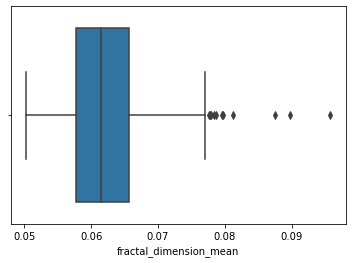

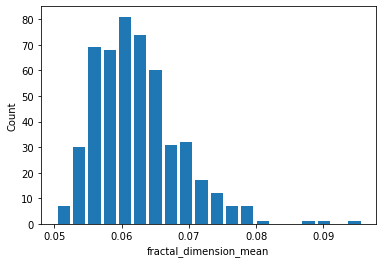

fractal_dimension_mean 0.043761820709716764 0.08096415123417093
(4, 30)
fractal_dimension_mean  outliers  4
radius_se



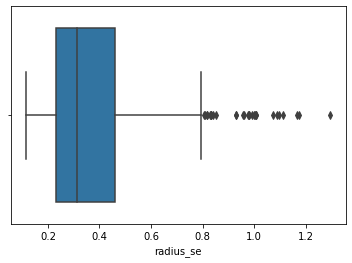

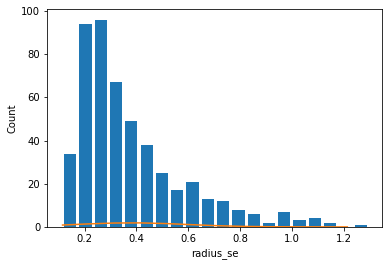

radius_se -0.2573481912142527 1.016926147126076
(7, 30)
radius_se  outliers  7
texture_se



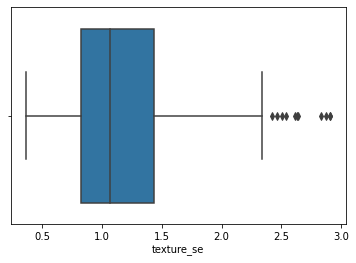

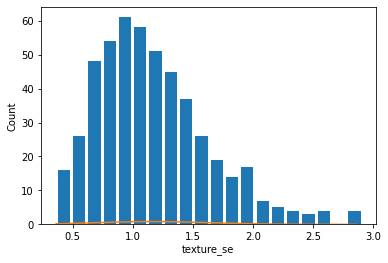

texture_se -0.2602721134152173 2.6016396484853566
(7, 30)
texture_se  outliers  7
perimeter_se



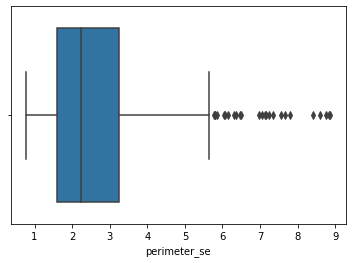

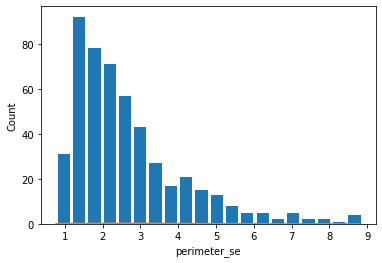

perimeter_se -1.7995814798329621 7.1592115399531995
(10, 30)
perimeter_se  outliers  10
area_se



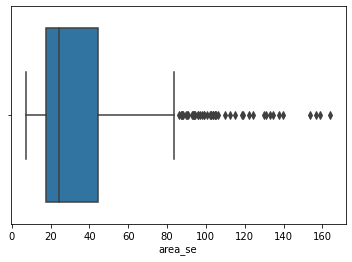

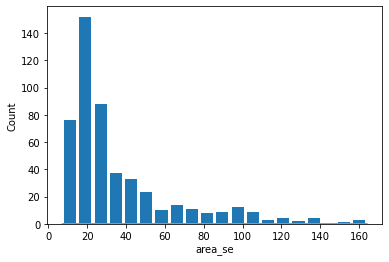

area_se -51.78713303335607 124.42868012754445
(10, 30)
area_se  outliers  10
smoothness_se



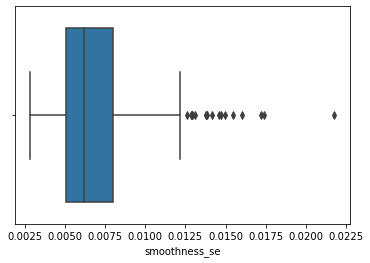

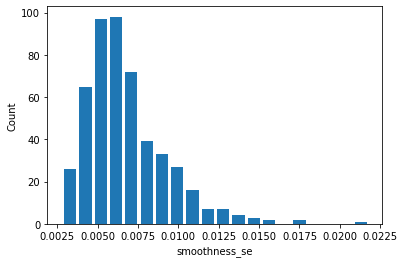

smoothness_se -0.0008264726735817138 0.01442995964752962
(8, 30)
smoothness_se  outliers  8
compactness_se



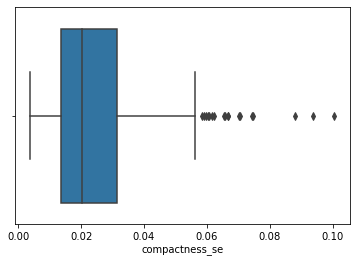

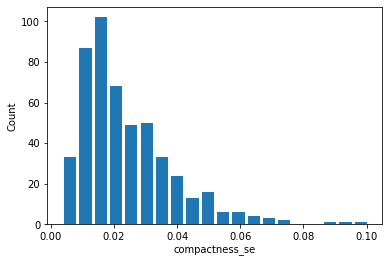

compactness_se -0.01990017836910688 0.06821294390016902
(7, 30)
compactness_se  outliers  7
concavity_se



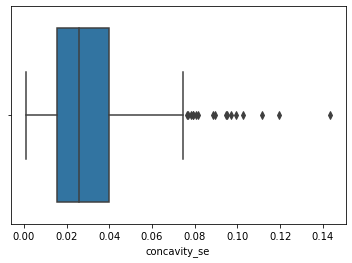

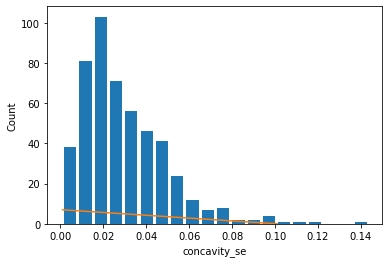

concavity_se -0.029933378122325383 0.08959893203014097
(8, 30)
concavity_se  outliers  8
concave points_se



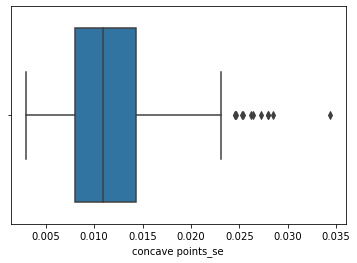

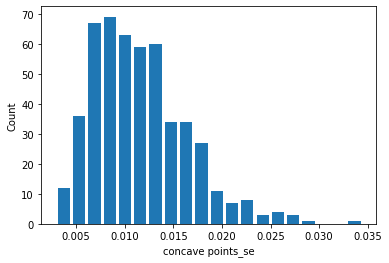

concave points_se -0.003057771397365681 0.026249599052676292
(6, 30)
concave points_se  outliers  6
symmetry_se



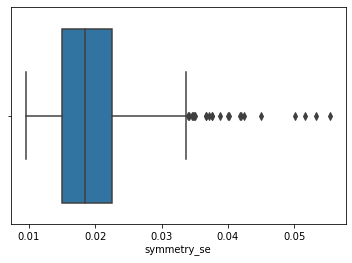

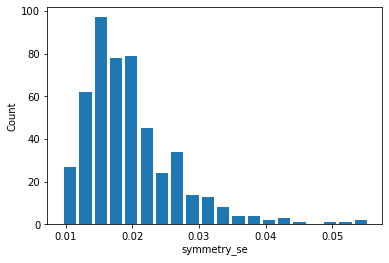

symmetry_se -0.0010567363186295801 0.0405193375210344
(8, 30)
symmetry_se  outliers  8
fractal_dimension_se



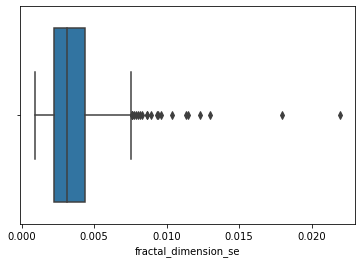

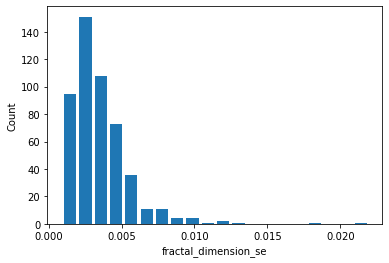

fractal_dimension_se -0.002666006828172513 0.009827470555627422
(7, 30)
fractal_dimension_se  outliers  7
radius_worst



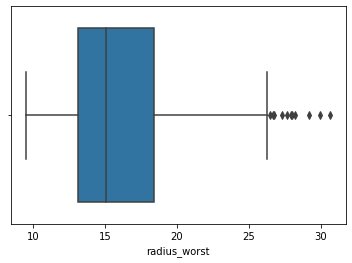

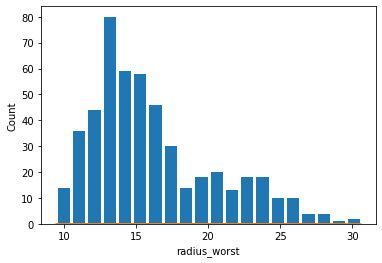

radius_worst 3.169336152357646 29.247541603153365
(2, 30)
radius_worst  outliers  2
texture_worst



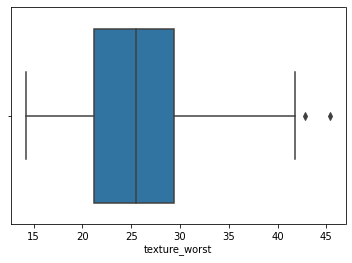

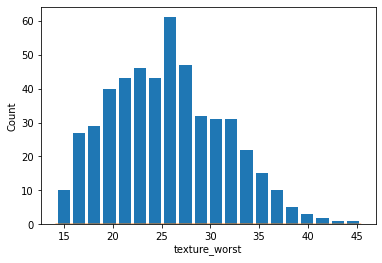

texture_worst 8.066664485540922 43.138545935300755
(1, 30)
texture_worst  outliers  1
perimeter_worst



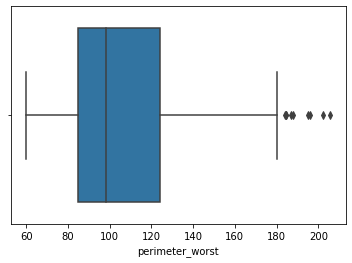

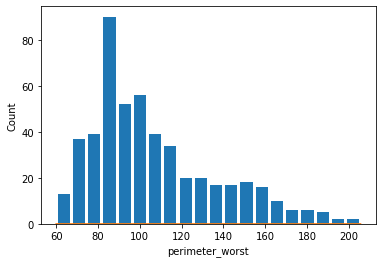

perimeter_worst 16.86240871439307 196.61903417137844
(2, 30)
perimeter_worst  outliers  2
area_worst



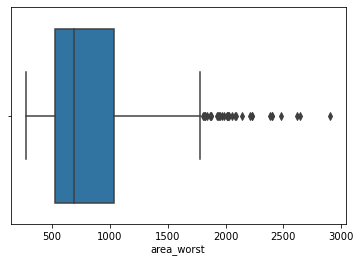

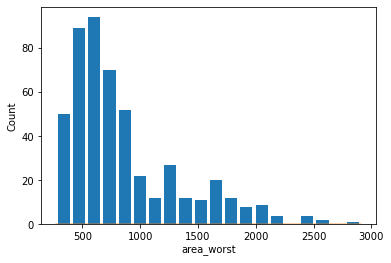

area_worst -607.0259015416215 2328.784218174888
(7, 30)
area_worst  outliers  7
smoothness_worst



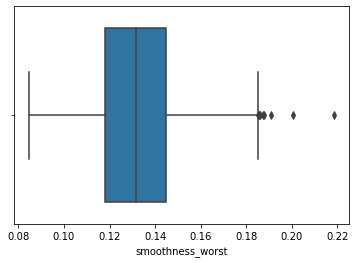

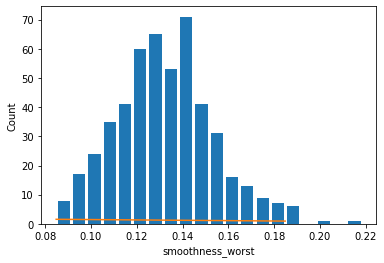

smoothness_worst 0.06808289650539695 0.1970246786449037
(2, 30)
smoothness_worst  outliers  2
compactness_worst



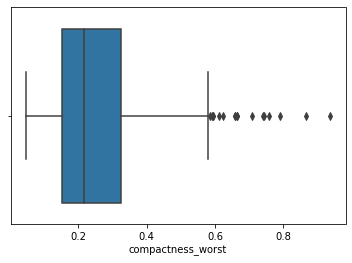

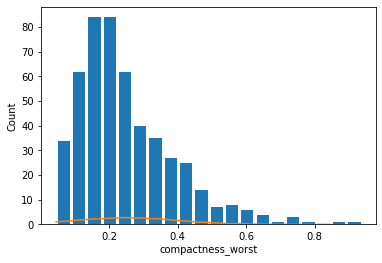

compactness_worst -0.1771936462885118 0.6800459508977308
(7, 30)
compactness_worst  outliers  7
concavity_worst



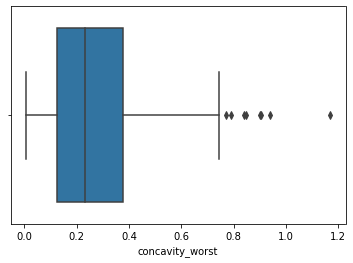

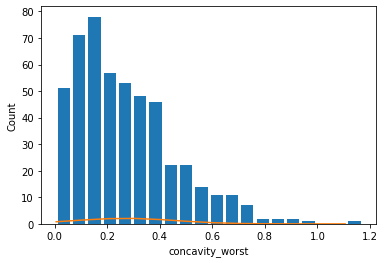

concavity_worst -0.3025404351389188 0.8405405954595601
(5, 30)
concavity_worst  outliers  5
concave points_worst



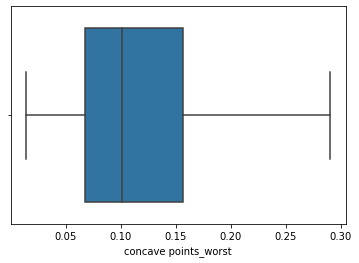

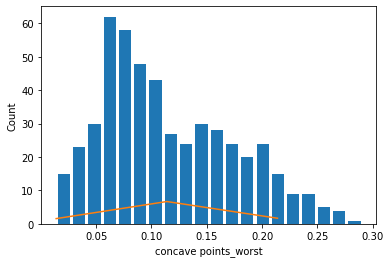

concave points_worst -0.06362966830666285 0.29383523944894746
(0, 30)
concave points_worst  outliers  0
symmetry_worst



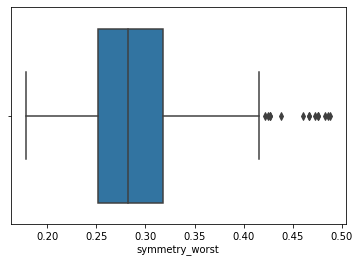

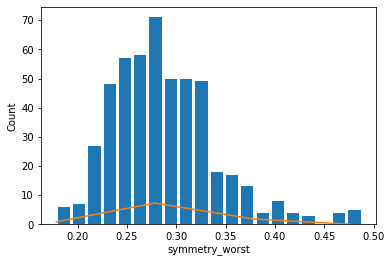

symmetry_worst 0.12768522446421496 0.4497115691229594
(9, 30)
symmetry_worst  outliers  9
fractal_dimension_worst



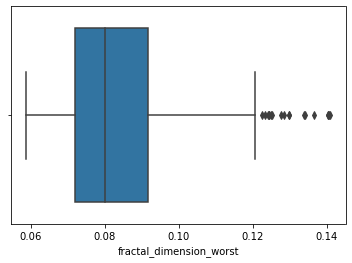

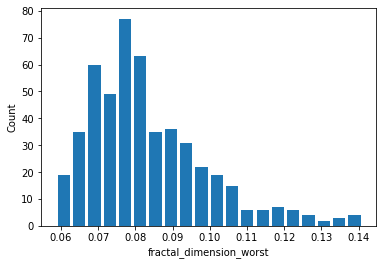

fractal_dimension_worst 0.03563802658824017 0.1312922740129622
(7, 30)
fractal_dimension_worst  outliers  7


In [31]:
check_outlier()

In [32]:
def remove_outlier():
    global X
    print(X.shape)
    for i in X.columns:
        print(i)
        print()
        X[i].describe()
        sns.boxplot(X[i])
        plt.show()

        plt.hist(X[i], bins=20, rwidth=0.8)
        plt.xlabel(i)
        plt.ylabel('Count')
        plt.show()
        max_limit = X[i].mean() + 3*X[i].std()
        min_limit = X[i].mean() - 3*X[i].std()
        print(i, min_limit,max_limit)
        
        print(X[(X[i]>max_limit) | (X[i]<min_limit)].shape)
        print(i,' outliers ',len(X[(X[i]>max_limit) | (X[i]<min_limit)]))
        
        X[(X[i]>max_limit) | (X[i]<min_limit)]
        X=X[(X[i]>min_limit) & (X[i]<max_limit)]# outlier removed

(499, 30)
radius_mean



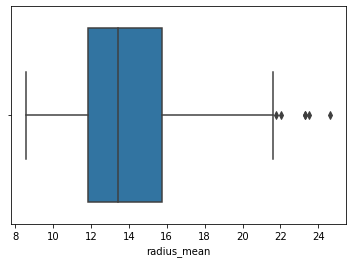

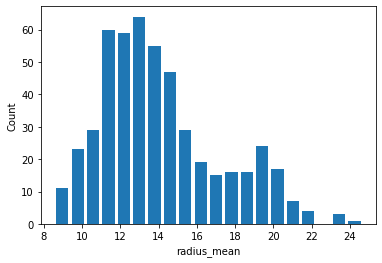

radius_mean 4.639209471435564 23.564257462432195
(1, 30)
radius_mean  outliers  1
texture_mean



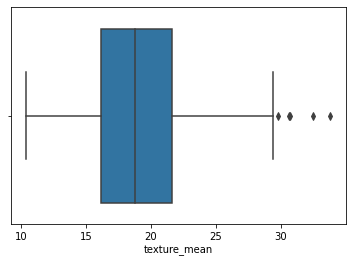

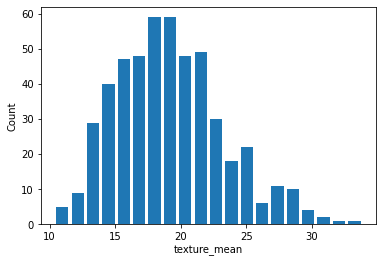

texture_mean 6.852263377883997 31.456732606051762
(2, 30)
texture_mean  outliers  2
perimeter_mean



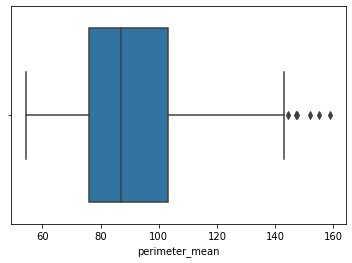

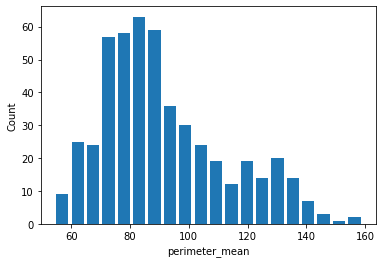

perimeter_mean 27.402709009335226 155.6412022809874
(1, 30)
perimeter_mean  outliers  1
area_mean



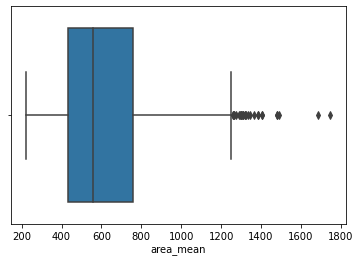

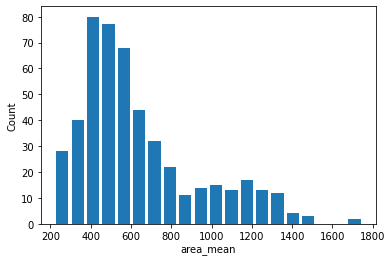

area_mean -245.99764223512727 1525.1968341543202
(2, 30)
area_mean  outliers  2
smoothness_mean



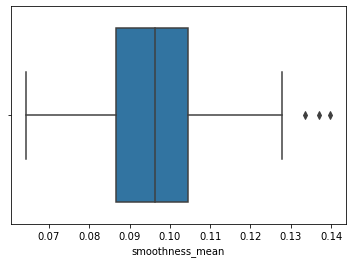

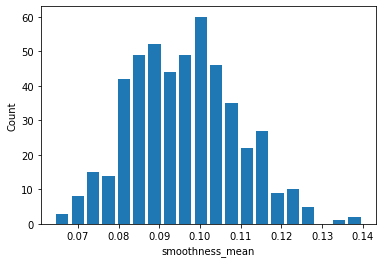

smoothness_mean 0.057086562808726565 0.13523278810405212
(2, 30)
smoothness_mean  outliers  2
compactness_mean



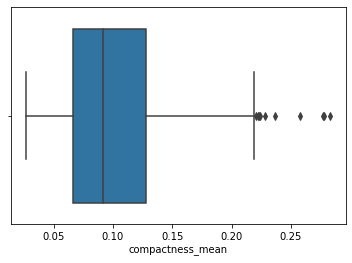

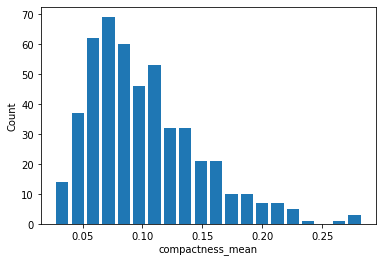

compactness_mean -0.03619671156073005 0.23889447123486446
(4, 30)
compactness_mean  outliers  4
concavity_mean



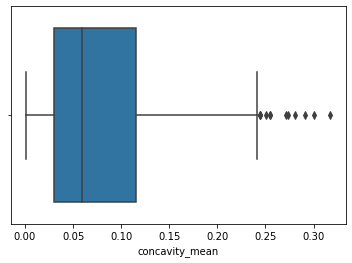

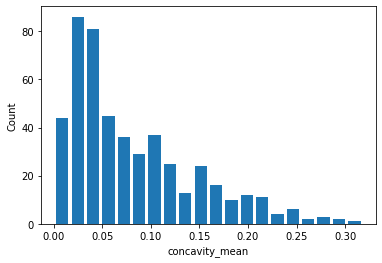

concavity_mean -0.11265155889633119 0.2747122352823681
(4, 30)
concavity_mean  outliers  4
concave points_mean



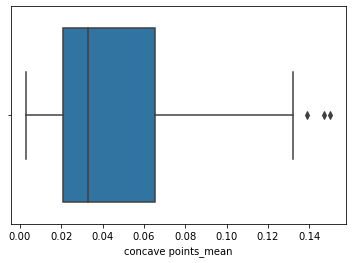

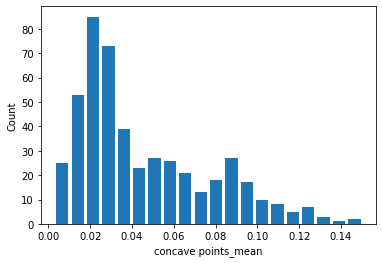

concave points_mean -0.05018598966852896 0.14117690064161384
(2, 30)
concave points_mean  outliers  2
symmetry_mean



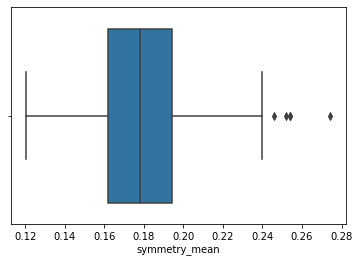

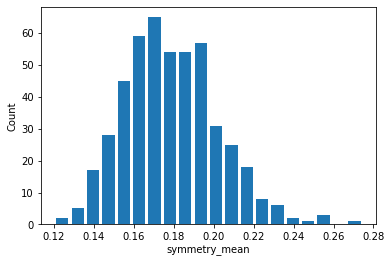

symmetry_mean 0.10827325923397296 0.24966977610906255
(4, 30)
symmetry_mean  outliers  4
fractal_dimension_mean



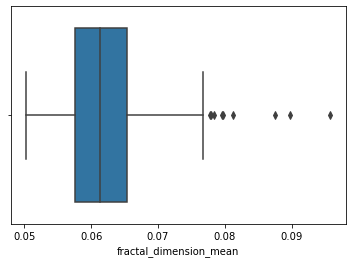

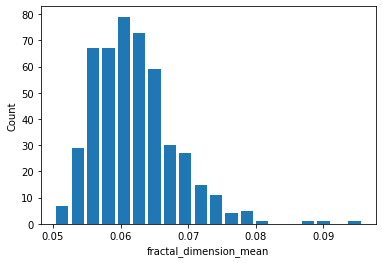

fractal_dimension_mean 0.04409354055261331 0.08012566280168434
(4, 30)
fractal_dimension_mean  outliers  4
radius_se



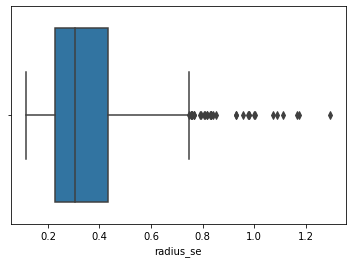

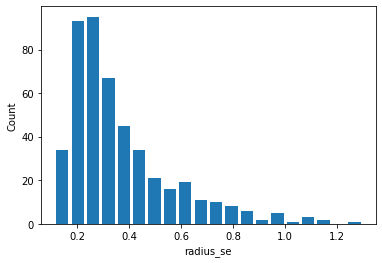

radius_se -0.2445426965061992 0.9801439650051418
(10, 30)
radius_se  outliers  10
texture_se



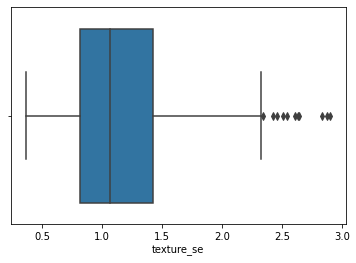

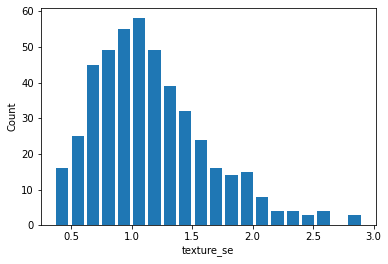

texture_se -0.2629057703844455 2.5904262887429756
(6, 30)
texture_se  outliers  6
perimeter_se



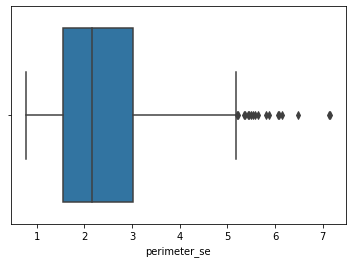

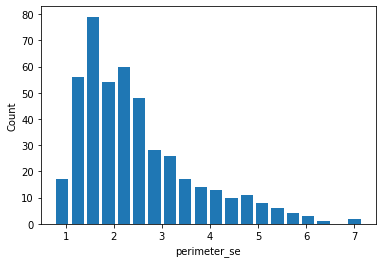

perimeter_se -1.1283753799558158 6.055056780393453
(5, 30)
perimeter_se  outliers  5
area_se



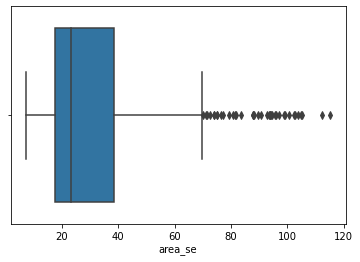

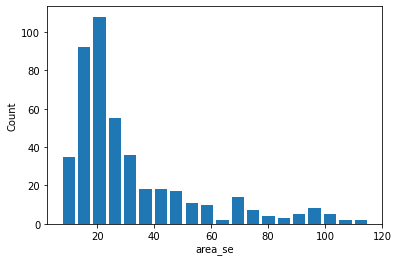

area_se -35.60995736808122 99.0106918813556
(9, 30)
area_se  outliers  9
smoothness_se



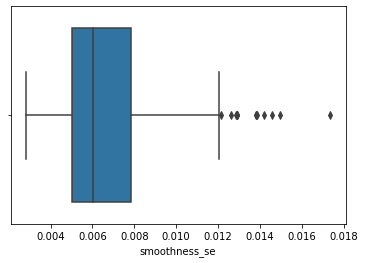

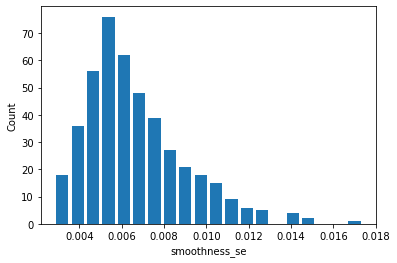

smoothness_se -0.0004043753579358513 0.013679404703308322
(7, 30)
smoothness_se  outliers  7
compactness_se



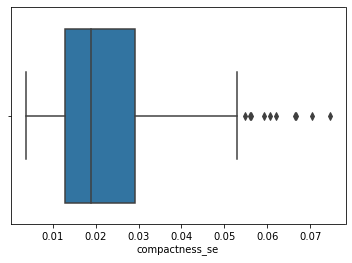

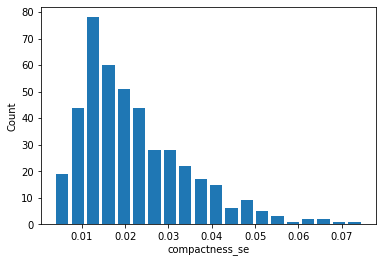

compactness_se -0.015283181106054932 0.05959497927119256
(6, 30)
compactness_se  outliers  6
concavity_se



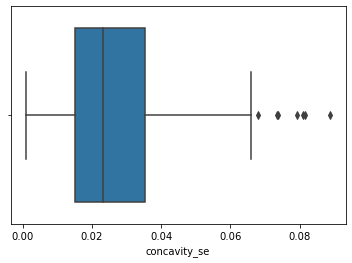

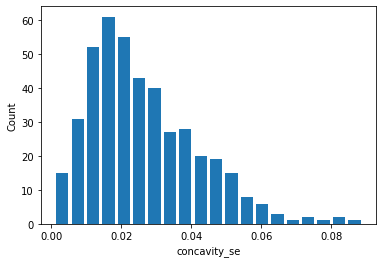

concavity_se -0.020184818592147047 0.07304788696424008
(6, 30)
concavity_se  outliers  6
concave points_se



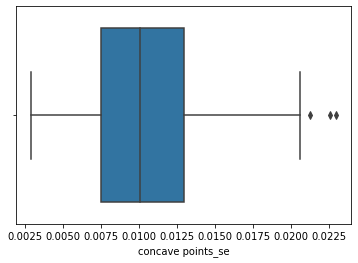

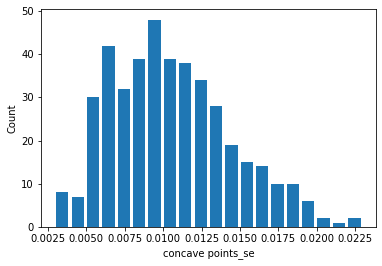

concave points_se -0.0011489275918936427 0.022257620988120078
(2, 30)
concave points_se  outliers  2
symmetry_se



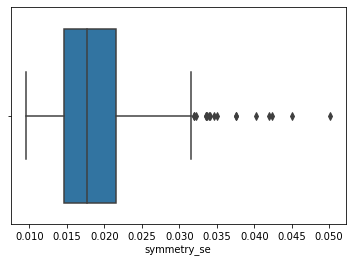

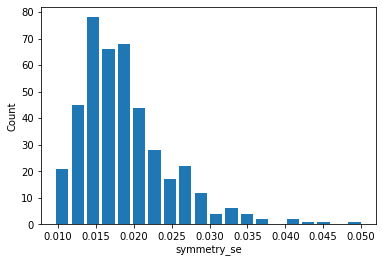

symmetry_se 0.0008674895323273479 0.03690212658141674
(7, 30)
symmetry_se  outliers  7
fractal_dimension_se



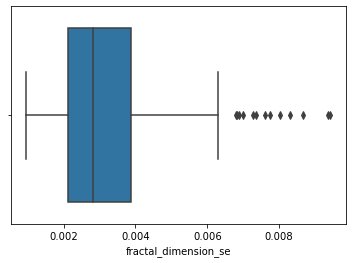

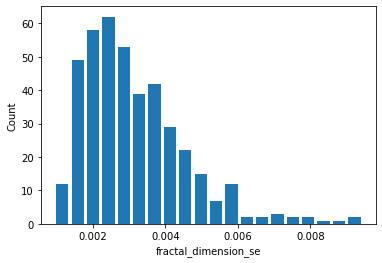

fractal_dimension_se -0.0011028321476634633 0.007407772870555027
(7, 30)
fractal_dimension_se  outliers  7
radius_worst



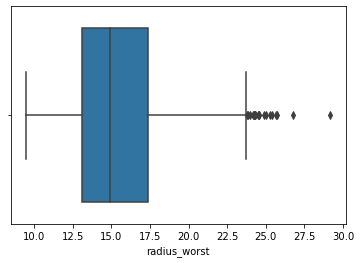

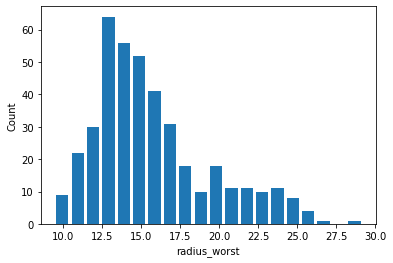

radius_worst 4.588956433269971 26.91203866476925
(1, 30)
radius_worst  outliers  1
texture_worst



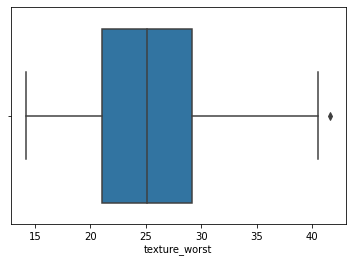

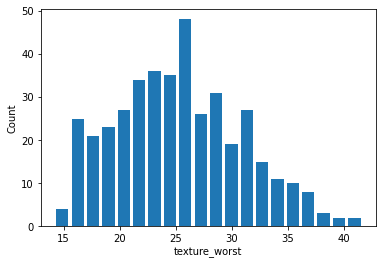

texture_worst 8.391987017883263 42.24221445631821
(0, 30)
texture_worst  outliers  0
perimeter_worst



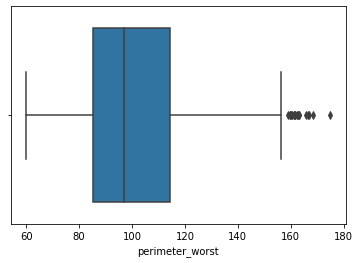

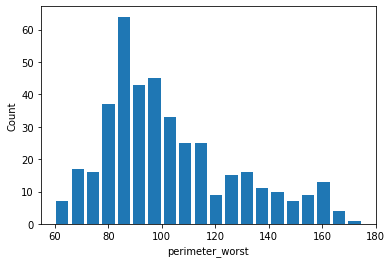

perimeter_worst 28.627365501229633 177.21941582555158
(0, 30)
perimeter_worst  outliers  0
area_worst



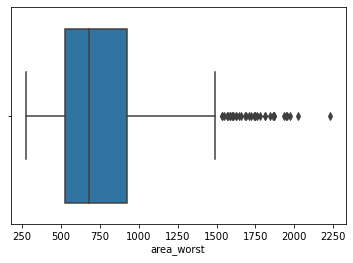

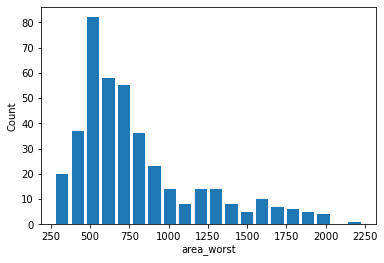

area_worst -381.7061408135303 1975.9700228774125
(2, 30)
area_worst  outliers  2
smoothness_worst



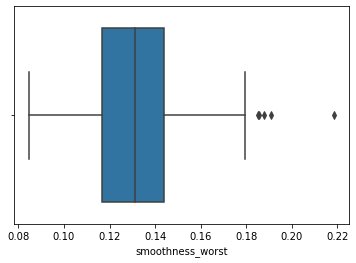

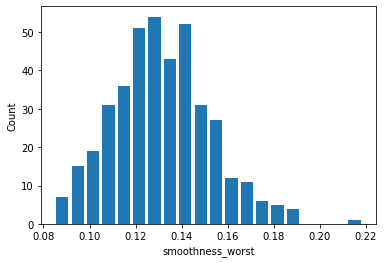

smoothness_worst 0.06797417435605423 0.19503125774271107
(1, 30)
smoothness_worst  outliers  1
compactness_worst



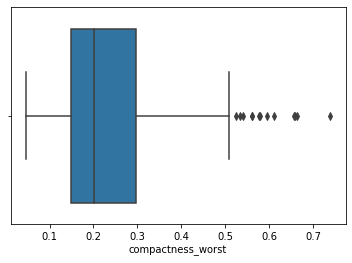

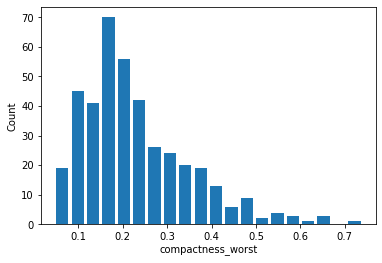

compactness_worst -0.1353913128635077 0.5964127485070724
(5, 30)
compactness_worst  outliers  5
concavity_worst



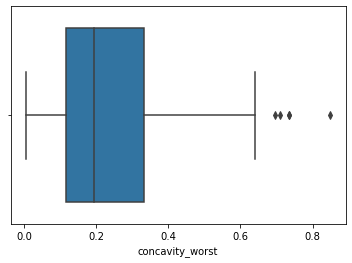

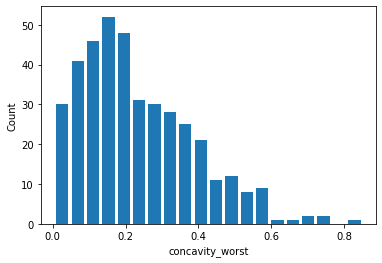

concavity_worst -0.23037371831955478 0.6980020892468731
(4, 30)
concavity_worst  outliers  4
concave points_worst



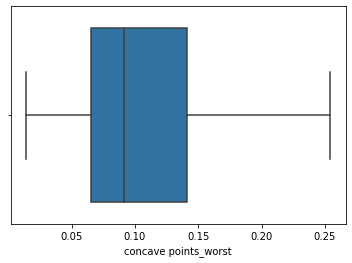

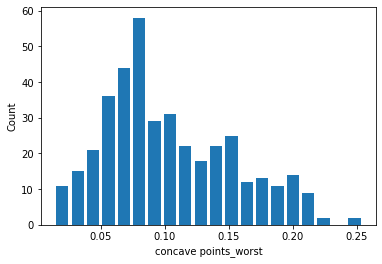

concave points_worst -0.04741350660509033 0.25472687369369795
(0, 30)
concave points_worst  outliers  0
symmetry_worst



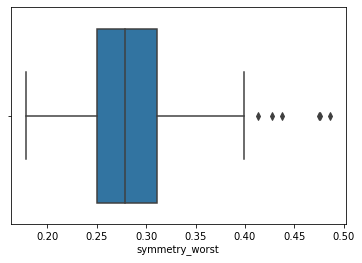

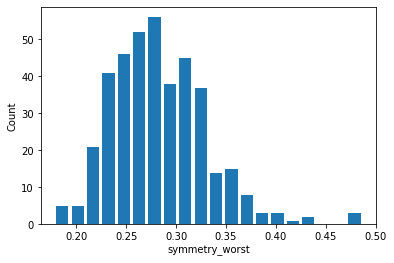

symmetry_worst 0.14098763581330825 0.425759705958844
(5, 30)
symmetry_worst  outliers  5
fractal_dimension_worst



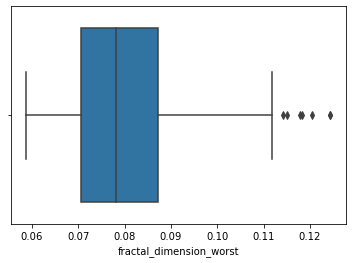

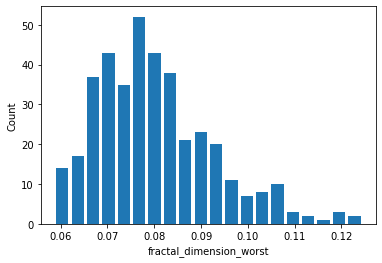

fractal_dimension_worst 0.042733564183369904 0.11747187171406598
(5, 30)
fractal_dimension_worst  outliers  5


In [33]:
remove_outlier()

In [34]:
X.shape

(385, 30)

In [ ]:
sns.pairplot(X)